# Evaluating KNN

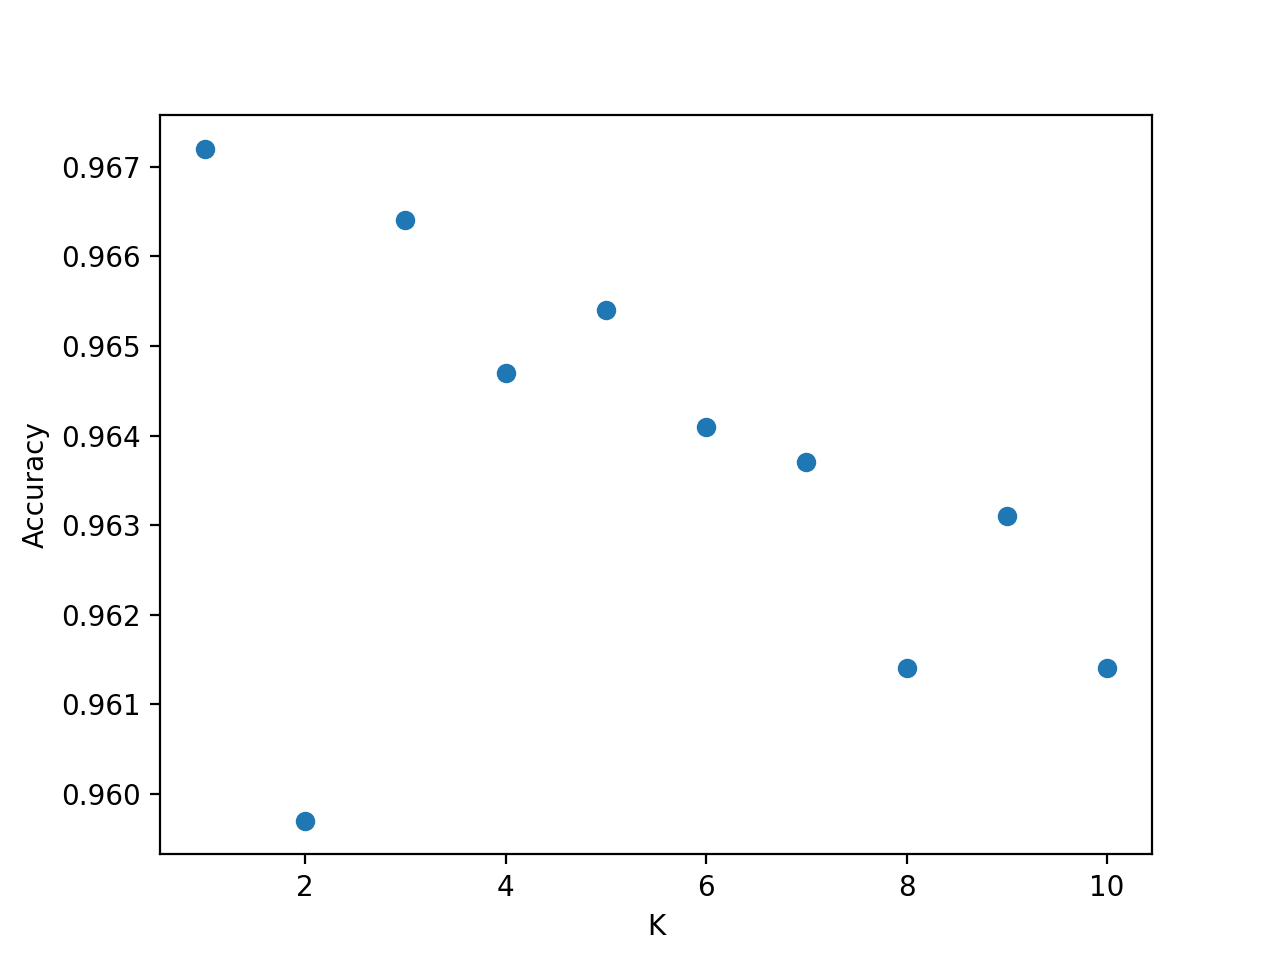

Highest Accuracy is 96.7%


In [22]:
from IPython.display import Image 
pil_img = Image(filename='KNN.png')
display(pil_img)
print("Highest Accuracy is 96.7%")

# Evaluating MLP

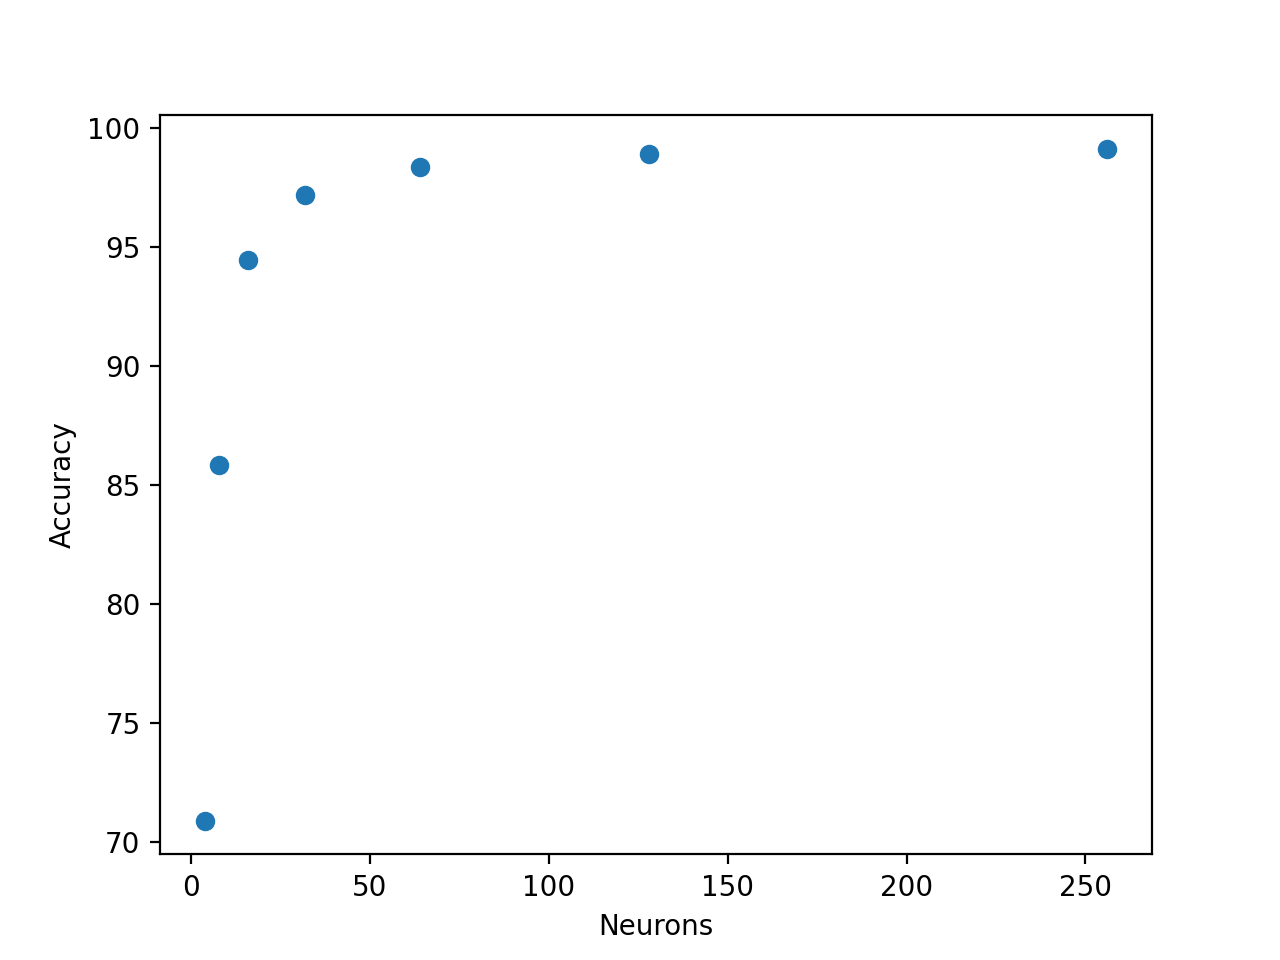

Highest Accuracy is 98.97%


In [23]:
pil_img = Image(filename='MLP.png')
display(pil_img)
print("Highest Accuracy is 98.97%")

# Evaluating CNN

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import sys

saved_path = 'CNN.pth'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Using", device)

criterion = nn.CrossEntropyLoss()


transform = transforms.Compose(
    [   transforms.ToTensor()])

testset = torchvision.datasets.MNIST(root = 'data/', train = False, transform = transform, download = True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=8)

class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = LeNet5().to(device)
net.load_state_dict(torch.load(saved_path))

def train_and_val_fn(net, loader, criterion):

    t = tqdm(loader, file=sys.stdout)

    t.set_description('Validation')
    net.eval()

    running_loss = 0.0
    total_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        t.update()

    t.close()
    average_loss = float(total_loss/len(loader))
    acc = 100 * correct / total
    return average_loss, acc


average_val_loss, val_acc = train_and_val_fn(net = net, loader = testloader, criterion=criterion)

print("Average Test Loss :", average_val_loss)
print("Validation acc :", val_acc, "%")



Using cuda:0
Validation: 100%|██████████| 157/157 [00:00<00:00, 222.85it/s]
Average Test Loss : 0.01950873594483756
Validation acc : 99.43 %


# Evaluating CAN

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import sys

saved_path = 'CAN.pth'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Using", device)

criterion = nn.CrossEntropyLoss()


transform = transforms.Compose(
    [   transforms.ToTensor()])

testset = torchvision.datasets.MNIST(root = 'data/', train = False, transform = transform, download = True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=8)

class can(nn.Module):

    def __init__(self):
        super(can, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, dilation = 1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, dilation = 2, padding = 2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, dilation = 4, padding = 4)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, dilation = 8, padding = 8)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=10, kernel_size=3, dilation = 1, padding = 1)
        self.avgPool = nn.AvgPool2d(kernel_size=28)



    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        x = F.leaky_relu(self.conv3(x))
        x = F.leaky_relu(self.conv4(x))
        x = F.leaky_relu(self.conv5(x))
        x = self.avgPool(x)
        x = torch.squeeze(x)
        return x

net = can().to(device)
net.load_state_dict(torch.load(saved_path))

def train_and_val_fn(net, loader, criterion):

    t = tqdm(loader, file=sys.stdout)

    t.set_description('Validation')
    net.eval()

    running_loss = 0.0
    total_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        t.update()

    t.close()
    average_loss = float(total_loss/len(loader))
    acc = 100 * correct / total
    return average_loss, acc


average_val_loss, val_acc = train_and_val_fn(net = net, loader = testloader, criterion=criterion)

print("Average Test Loss :", average_val_loss)
print("Validation acc :", val_acc, "%")



Using cuda:0
Validation: 100%|██████████| 157/157 [00:00<00:00, 245.24it/s]
Average Test Loss : 0.015925355371732362
Validation acc : 99.48 %
